##IMPORT THE LIBRARIES

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import plotly.express as px 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv("/content/creditcard.csv")

##DATA PREPROCESSING

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [ ]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(283726, 31)

##DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f759c7647f0>,
      dtype=object)

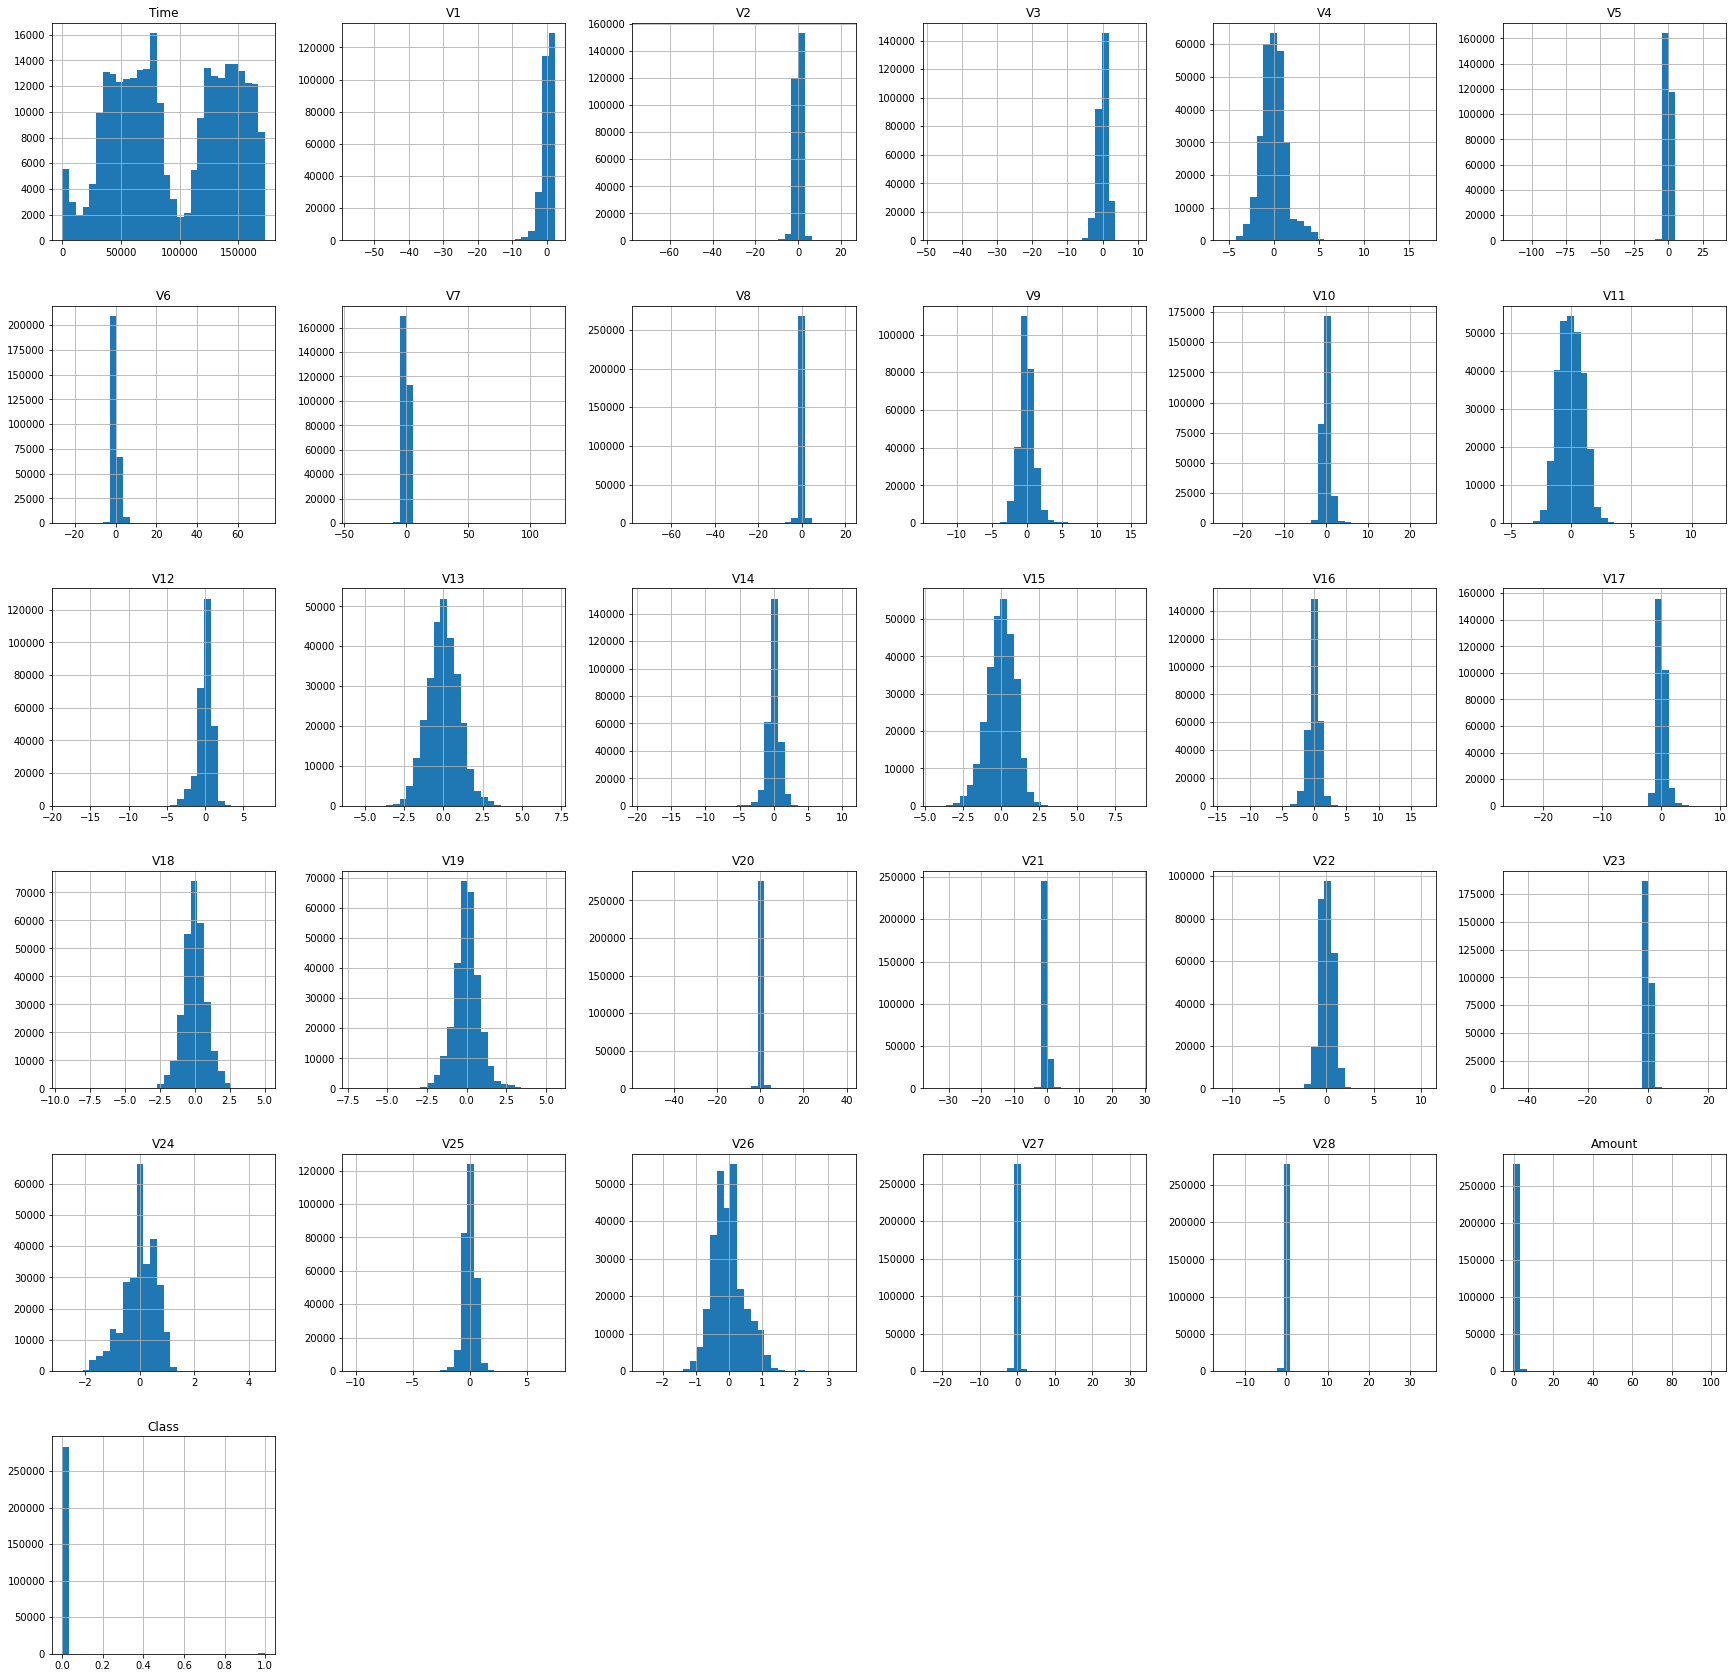

In [ ]:
df.hist(bins=30, figsize=(30, 30))

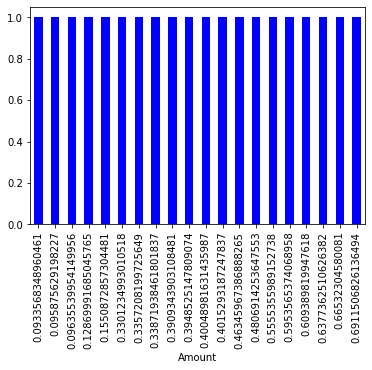

In [ ]:
df.groupby('Amount')['Class'].mean().nlargest(20).plot.bar(color='blue')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


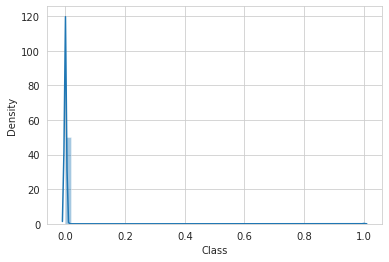

In [ ]:
sns.set_style(style='whitegrid')
sns.distplot(df['Class'])

##SPLITTING 

In [ ]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
X_train.shape

(212794, 30)

In [ ]:
X_test.shape

(70932, 30)

In [ ]:
y_train.shape

(212794,)

In [ ]:
y_test.shape

(70932,)

##DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
print('Train Score is : ' , regressor.score(X_train, y_train))
print('Test Score is : ' , regressor.score(X_test, y_test))

Train Score is :  1.0
Test Score is :  0.28980773822207273


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

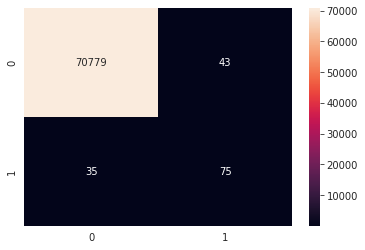

In [ ]:
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9989003552698359


[Text(0.31650991503256654, 0.9772727272727273, 'X[17] <= -2.704\nsquared_error = 0.002\nsamples = 212794\nvalue = 0.002'),
 Text(0.19401330376940132, 0.9318181818181818, 'X[12] <= -2.181\nsquared_error = 0.176\nsamples = 328\nvalue = 0.771'),
 Text(0.14855875831485588, 0.8863636363636364, 'X[26] <= -0.225\nsquared_error = 0.144\nsamples = 304\nvalue = 0.826'),
 Text(0.08425720620842572, 0.8409090909090909, 'X[27] <= 0.915\nsquared_error = 0.235\nsamples = 98\nvalue = 0.622'),
 Text(0.04434589800443459, 0.7954545454545454, 'X[14] <= -3.875\nsquared_error = 0.154\nsamples = 63\nvalue = 0.81'),
 Text(0.017738359201773836, 0.75, 'X[8] <= -15.198\nsquared_error = 0.043\nsamples = 44\nvalue = 0.955'),
 Text(0.008869179600886918, 0.7045454545454546, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.026607538802660754, 0.7045454545454546, 'X[28] <= 0.791\nsquared_error = 0.023\nsamples = 43\nvalue = 0.977'),
 Text(0.017738359201773836, 0.6590909090909091, 'squared_error = 0.0\nsamples 

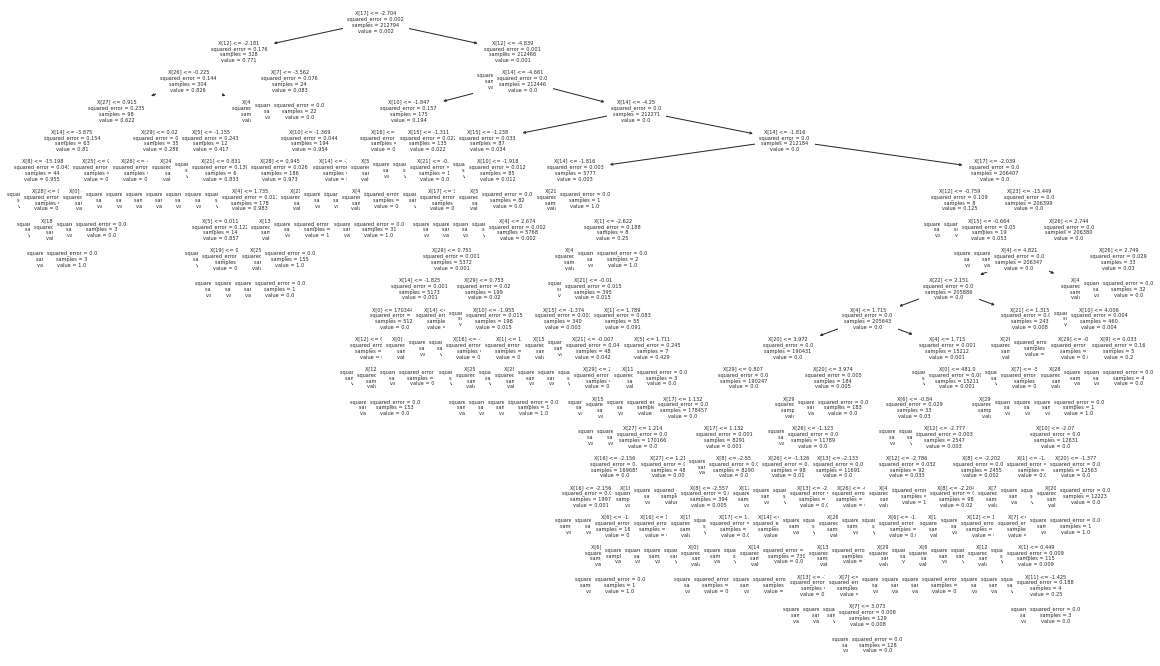

In [ ]:
from sklearn import tree 
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(regressor,fontsize=5) 

##ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9990695313821688


##ADABOOST WITH ESTIMATOR

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
abc =AdaBoostClassifier(n_estimators=20, base_estimator=RandomForestClassifier(random_state=42),learning_rate=0.5)
model = abc.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995347656910845


##LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy :",accuracy_score(y_test,y_pred)*100 ,"%") 

accuracy : 99.90554333728078 %


In [ ]:
Precision=precision_score(y_test,y_pred,pos_label='positive',average='micro') 
Precision

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9990554333728078

In [ ]:
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='micro'))

Recall Score :  0.9990554333728078


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
print("F1 Score : ",f1_score(y_test, y_pred,pos_label='positive',average='micro'))

F1 Score :  0.9990554333728078


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[70791,    31],
       [   36,    74]])

##SVM LINEAR KERNEL

As the training data is longer SVM takes more time

In [ ]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 42)
svcclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70807,    15],
       [   81,    29]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9986465911013365


##RBF KERNEL

In [ ]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 42)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9984492189702814


##SIGMOID KERNEL

In [ ]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid', random_state = 42)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70822,     0],
       [  110,     0]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9984492189702814


##RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor(max_depth=4,random_state=6)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([0.00024837, 0.00024837, 0.00031418, ..., 0.00024837, 0.00024837,
       0.00048237])

In [ ]:
reg.score(X_test, y_test)

0.6582657185571605

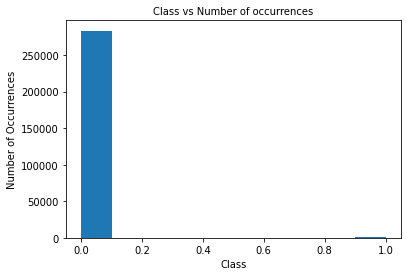

In [ ]:
plt.hist(df['Class'])
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.title('Class vs Number of occurrences', fontweight = 20, fontsize = 10)
plt.show()

##XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
xgb.score(X_test, y_test)

0.9995347656910845